/opt/anaconda3/envs/GEE/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1104.7070 - val_loss: 2187.0173
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 713.8289 - val_loss: 2183.8828
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 568.8558 - val_loss: 2179.9514
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 695.1828 - val_loss: 2178.6172
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 777.3854 - val_loss: 2175.6958
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1201.3917 - val_loss: 2171.7935
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 648.7959 - val_loss: 2171.0017
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 898.2692 - val_loss: 2167.8562
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1227.3870 - val_loss: 2162.4099
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 841.3947 - val_loss: 2159.0759
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1468.4130 - val_loss: 2151.1963
Epo

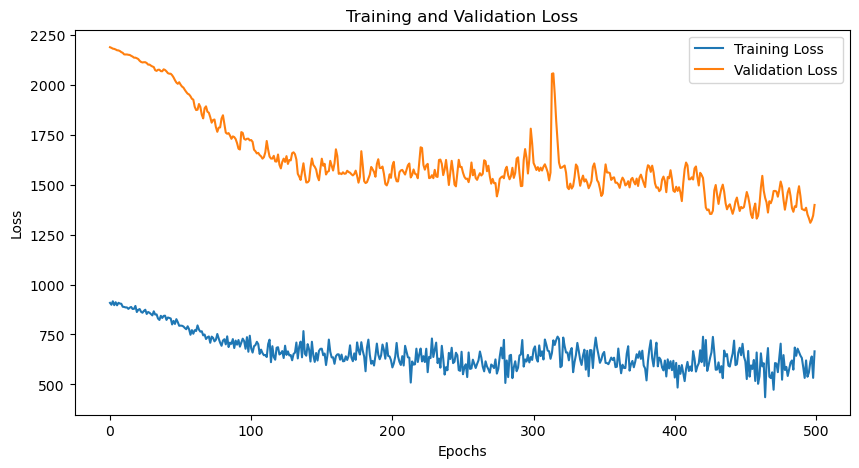

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Load the data
data = pd.read_csv('Data_Merged.csv')

# Handle missing values
data = data.dropna()

# Convert 'timestamp_sentinel2' to datetime
data['timestamp_sentinel2'] = pd.to_datetime(data['timestamp_sentinel2'])

# Define the target variable (y)
target = 'Turbidity_Buoy_(NTU)'

# Select features
features = [
    *[f'point{point}_B{band}' for band in [2, 3, 4, 8, 8, 8, 8, 11, 12] for point in range(1, 23)],
    *[f'point{point}_cs' for point in range(1, 23)],
    *[f'point{point}_cs_cdf' for point in range(1, 23)],
    'B2_AVG', 'B3_AVG', 'B4_AVG', 'B8_AVG', 'B8A_AVG', 'B11_AVG', 'B12_AVG',
    'cs_AVG', 'cs_cdf_AVG',
    'Ground_Measurements_time_diff_(seconds)', 'Lake_Height_(m)', 
    'PercentFull_Active_Lake_Storage_(%)', 'Snow_Volume_Opuha_Catchment_(mm)',
    'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)', 
    'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)', 
    'Pmsl(hPa)', 'Pstn(hPa)', 'Water_Temp_Buoy_(degC)', 'Water_Temp_Platform_(degC)'
]

# features = [
#     'B2_AVG', 'B3_AVG', 'B4_AVG', 'B8_AVG', 'B8A_AVG', 'B11_AVG', 'B12_AVG',
#     'cs_AVG', 'cs_cdf_AVG',
#     'Ground_Measurements_time_diff_(seconds)', 'Lake_Height_(m)', 
#     'PercentFull_Active_Lake_Storage_(%)', 'Snow_Volume_Opuha_Catchment_(mm)',
#     'WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)', 
#     'Rain(mm)', 'Tdry(C)', 'TWet(C)', 'RH(%)', 'Tmax(C)', 'Tmin(C)', 
#     'Pmsl(hPa)', 'Pstn(hPa)', 'Water_Temp_Buoy_(degC)', 'Water_Temp_Platform_(degC)'
# ]

X = data[features]
y = data[target]

# Normalise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Mean Squared Error: {mse_nn} NTU^2")
print(f"Neural Network Root Mean Squared Error: {rmse_nn} NTU")
print(f"Neural Network R-squared: {r2_nn}")

# Plot the loss for both training and validation data
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the plot function
plot_loss(history)
